Lisa Ho Yen Xin 20297507

# [1] Import Functions

## [1.1] Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%run /content/drive/MyDrive/FYP/ImportFunctions.ipynb

## [1.2] Jupyter

In [ ]:
%run ImportFunctions.ipynb

# [2] Import Libraries

In [ ]:
import cv2
import numpy as np
import seaborn as sns
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tabulate import tabulate
import tensorflow as tf

# [3] Load Dataset

## [3.1] Google Colab

In [ ]:
# Load images and labels
images = np.load('/content/drive/My Drive/FYP/dataset/random_images.npy')
labels = np.load('/content/drive/My Drive/FYP/dataset/random_labels.npy')

## [3.2] Jupyter

In [ ]:
# Load images and labels
images = np.load('dataset/random_images.npy')
labels = np.load('dataset/random_labels.npy')

# [4] Prepare Dataset

In [ ]:
images = resize_images(images, (224,224))

In [ ]:
# Display array shapes
display_array_shapes(images, labels)

+--------------+--------------------+
| Array Name   | Shape              |
+==============+====================+
| Images       | (957, 224, 224, 3) |
+--------------+--------------------+
| Labels       | (957,)             |
+--------------+--------------------+


In [ ]:
# Get the number of unique labels
num_classes = len(np.unique(labels))

print("Number of unique labels:", num_classes)

Number of unique labels: 9


In [ ]:
# Binarize labels
labels_binarized = binarize_labels(labels)

# [5] Train Model

In [ ]:
# Split the data into training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels_binarized, test_size=0.2, random_state=42)

# Further split the temporary data into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Train shape:", X_train.shape, y_train.shape)
print("Validation shape:", X_val.shape, y_val.shape)
print("Test shape:", X_test.shape, y_test.shape)

Train shape: (765, 224, 224, 3) (765, 9)
Validation shape: (96, 224, 224, 3) (96, 9)
Test shape: (96, 224, 224, 3) (96, 9)


## [5.1] VGG-19

In [ ]:
# Build and compile VGG19 model
vgg19_model = build_and_compile_vgg19_model(num_classes)

2024-04-02 16:23:42.809508: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-04-02 16:23:43.063065: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (LSPMHPCHN01): /proc/driver/nvidia/version does not exist
2024-04-02 16:23:43.074963: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
# Train the model
vgg19_history = vgg19_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
vgg19_loss, vgg19_accuracy = vgg19_model.evaluate(X_val, y_val)

Epoch 1/10


2024-04-02 16:23:49.631071: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 539492352 exceeds 10% of free system memory.
2024-04-02 16:23:49.857433: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 539492352 exceeds 10% of free system memory.


 1/19 [>.............................] - ETA: 1:03 - loss: 2.4230 - accuracy: 0.0714

2024-04-02 16:23:51.892896: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 539492352 exceeds 10% of free system memory.
2024-04-02 16:23:51.940859: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 539492352 exceeds 10% of free system memory.


 2/19 [==>...........................] - ETA: 32s - loss: 3.2947 - accuracy: 0.0833 

2024-04-02 16:23:53.779818: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 539492352 exceeds 10% of free system memory.


19/19 [==============================] - 44s 2s/step - loss: 2.7724 - accuracy: 0.2549 - val_loss: 1.4802 - val_accuracy: 0.5625
Epoch 2/10
19/19 [==============================] - 58s 3s/step - loss: 0.9449 - accuracy: 0.6810 - val_loss: 1.2499 - val_accuracy: 0.5417
Epoch 3/10
19/19 [==============================] - 74s 3s/step - loss: 0.4749 - accuracy: 0.8902 - val_loss: 0.9930 - val_accuracy: 0.6562
Epoch 4/10
19/19 [==============================] - 98s 5s/step - loss: 0.2713 - accuracy: 0.9686 - val_loss: 0.9647 - val_accuracy: 0.6562
Epoch 5/10
19/19 [==============================] - 46s 2s/step - loss: 0.1886 - accuracy: 0.9830 - val_loss: 0.9122 - val_accuracy: 0.6354
Epoch 6/10
19/19 [==============================] - 42s 2s/step - loss: 0.1434 - accuracy: 0.9908 - val_loss: 0.9269 - val_accuracy: 0.6771
Epoch 7/10
19/19 [==============================] - 42s 2s/step - loss: 0.0988 - accuracy: 0.9987 - val_loss: 0.9691 - val_accuracy: 0.6875
Epoch 8/10
19/19 [=============

In [ ]:
# Calculate average loss and accuracy
vgg19_average_loss = sum(vgg19_history.history['val_loss']) / len(vgg19_history.history['val_loss'])
vgg19_average_accuracy = sum(vgg19_history.history['val_accuracy']) / len(vgg19_history.history['val_accuracy'])

print(f"Average Validation Loss: {vgg19_average_loss}, Average Validation Accuracy: {vgg19_average_accuracy}")

Average Validation Loss: 1.0286443769931792, Average Validation Accuracy: 0.640625


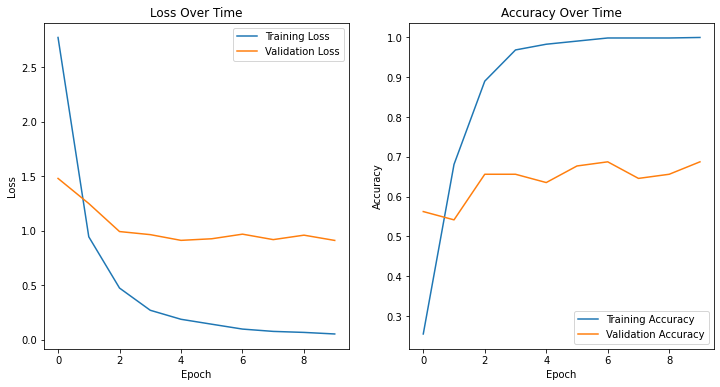

In [ ]:
plot_training_history(vgg19_history)

## [5.2] ResNet-101

In [ ]:
# Build and compile ResNet101 model
resnet101_model = build_and_compile_resnet101_model(num_classes)

In [ ]:
# Train the model
resnet101_history = resnet101_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
resnet101_loss, resnet101_accuracy = resnet101_model.evaluate(X_val, y_val)

Epoch 1/10
19/19 [==============================] - 61s 3s/step - loss: 7.3376 - accuracy: 0.1268 - val_loss: 5.0499 - val_accuracy: 0.0729
Epoch 2/10
19/19 [==============================] - 44s 2s/step - loss: 2.7556 - accuracy: 0.1765 - val_loss: 2.5099 - val_accuracy: 0.1354
Epoch 3/10
19/19 [==============================] - 44s 2s/step - loss: 2.2271 - accuracy: 0.2732 - val_loss: 2.9430 - val_accuracy: 0.1354
Epoch 4/10
19/19 [==============================] - 43s 2s/step - loss: 2.4765 - accuracy: 0.2680 - val_loss: 2.5584 - val_accuracy: 0.1667
Epoch 5/10
19/19 [==============================] - 47s 2s/step - loss: 2.2420 - accuracy: 0.2902 - val_loss: 2.5237 - val_accuracy: 0.2188
Epoch 6/10
19/19 [==============================] - 45s 2s/step - loss: 1.7490 - accuracy: 0.4065 - val_loss: 2.1868 - val_accuracy: 0.1979
Epoch 7/10
19/19 [==============================] - 44s 2s/step - loss: 1.5797 - accuracy: 0.4588 - val_loss: 2.6268 - val_accuracy: 0.1458
Epoch 8/10
19/19 [==

In [ ]:
# Calculate average loss and accuracy
resnet101_average_loss = sum(resnet101_history.history['val_loss']) / len(resnet101_history.history['val_loss'])
resnet101_average_accuracy = sum(resnet101_history.history['val_accuracy']) / len(resnet101_history.history['val_accuracy'])

print(f"Average Validation Loss: {resnet101_average_loss}, Average Validation Accuracy: {resnet101_average_accuracy}")

Average Validation Loss: 2.7919895887374877, Average Validation Accuracy: 0.1729166679084301


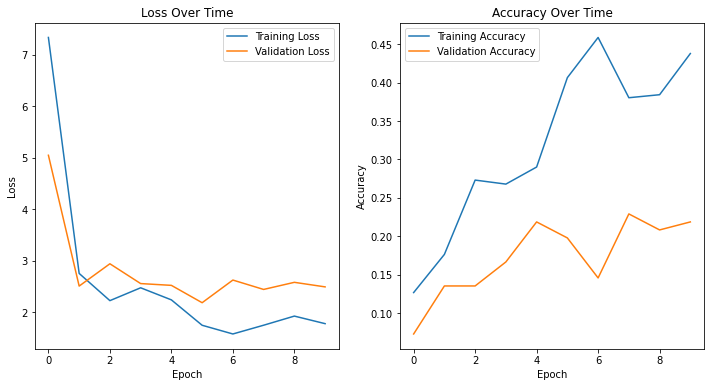

In [ ]:
# Plot training history
plot_training_history(resnet101_history)

## [5.3] MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2

# Build and compile MobileNetV3 model
mobilenetv2_model = build_and_compile_mobilenetv2_model(num_classes)

In [ ]:
# Train the model
mobilenetv2_history = mobilenetv2_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
mobilenetv2_loss, mobilenetv2_accuracy = mobilenetv2_model.evaluate(X_val, y_val)

Epoch 1/10
19/19 [==============================] - 9s 341ms/step - loss: 7.7004 - accuracy: 0.4562 - val_loss: 4.7280 - val_accuracy: 0.6771
Epoch 2/10
19/19 [==============================] - 6s 312ms/step - loss: 0.7708 - accuracy: 0.8993 - val_loss: 3.1883 - val_accuracy: 0.7708
Epoch 3/10
19/19 [==============================] - 6s 323ms/step - loss: 0.1405 - accuracy: 0.9739 - val_loss: 2.8576 - val_accuracy: 0.7812
Epoch 4/10
19/19 [==============================] - 6s 333ms/step - loss: 0.0631 - accuracy: 0.9830 - val_loss: 3.2540 - val_accuracy: 0.7917
Epoch 5/10
19/19 [==============================] - 6s 321ms/step - loss: 0.0326 - accuracy: 0.9908 - val_loss: 3.4463 - val_accuracy: 0.7917
Epoch 6/10
19/19 [==============================] - 6s 313ms/step - loss: 0.0074 - accuracy: 0.9961 - val_loss: 3.1084 - val_accuracy: 0.8021
Epoch 7/10
19/19 [==============================] - 6s 319ms/step - loss: 1.4609e-04 - accuracy: 1.0000 - val_loss: 3.0464 - val_accuracy: 0.7708
Ep

In [ ]:
# Calculate average loss and accuracy
mobilenetv2_average_loss = sum(mobilenetv2_history.history['val_loss']) / len(mobilenetv2_history.history['val_loss'])
mobilenetv2_average_accuracy = sum(mobilenetv2_history.history['val_accuracy']) / len(mobilenetv2_history.history['val_accuracy'])

print(f"Average Validation Loss: {mobilenetv2_average_loss}, Average Validation Accuracy: {mobilenetv2_average_accuracy}")

Average Validation Loss: 3.273014235496521, Average Validation Accuracy: 0.7708333253860473


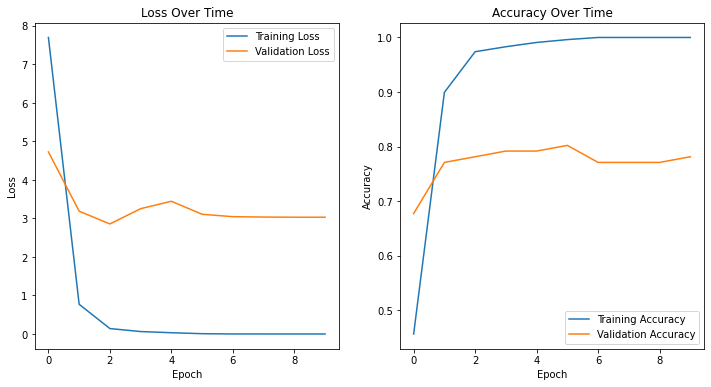

In [ ]:
# Plot training history
plot_training_history(mobilenetv2_history)

## [5.4] EfficientNet-B0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0

# Build and compile EfficientNet model
efficientnet_model = build_and_compile_efficientnet_model(num_classes)

In [ ]:
# Train the model
efficientnet_history = efficientnet_model.fit(X_train, y_train, batch_size=42, validation_data=(X_val, y_val), epochs=10)

# Evaluate the model on the validation data
efficientnet_loss, efficientnet_accuracy = efficientnet_model.evaluate(X_val, y_val)

Epoch 1/10
19/19 [==============================] - 24s 865ms/step - loss: 16.4162 - accuracy: 0.1137 - val_loss: 13.1283 - val_accuracy: 0.1458
Epoch 2/10
19/19 [==============================] - 13s 697ms/step - loss: 8.8362 - accuracy: 0.1163 - val_loss: 4.4095 - val_accuracy: 0.1979
Epoch 3/10
19/19 [==============================] - 13s 677ms/step - loss: 3.6681 - accuracy: 0.1098 - val_loss: 2.8200 - val_accuracy: 0.0729
Epoch 4/10
19/19 [==============================] - 12s 651ms/step - loss: 2.9320 - accuracy: 0.1085 - val_loss: 3.5548 - val_accuracy: 0.0729
Epoch 5/10
19/19 [==============================] - 14s 747ms/step - loss: 2.8058 - accuracy: 0.1163 - val_loss: 2.6482 - val_accuracy: 0.0833
Epoch 6/10
19/19 [==============================] - 14s 757ms/step - loss: 2.8381 - accuracy: 0.0980 - val_loss: 2.8144 - val_accuracy: 0.0729
Epoch 7/10
19/19 [==============================] - 13s 677ms/step - loss: 2.8570 - accuracy: 0.1033 - val_loss: 5.0775 - val_accuracy: 0.16

In [ ]:
# Calculate average loss and accuracy
efficientnet_average_loss = sum(efficientnet_history.history['val_loss']) / len(efficientnet_history.history['val_loss'])
efficientnet_average_accuracy = sum(efficientnet_history.history['val_accuracy']) / len(efficientnet_history.history['val_accuracy'])

print(f"Average Validation Loss: {efficientnet_average_loss}, Average Validation Accuracy: {efficientnet_average_accuracy}")

Average Validation Loss: 4.83171124458313, Average Validation Accuracy: 0.11458333358168601


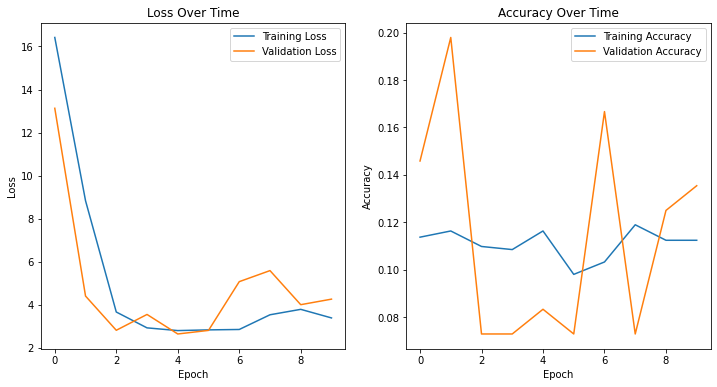

In [ ]:
# Plot training history
plot_training_history(efficientnet_history)

# [6] Save Model

## [6.1] Google Colab

In [ ]:
# Save models
vgg19_model.save('/content/drive/MyDrive/FYP/models/VGG19_random')
resnet101_model.save('/content/drive/MyDrive/FYP/models/ResNet101_random')
mobilenetv2_model.save('/content/drive/MyDrive/FYP/models/MobileNetV2_random')
efficientnet_model.save('/content/drive/MyDrive/FYP/models/EfficientNetB0_random')

## [6.2] Jupyter

In [ ]:
# Save models
vgg19_model.save('models/VGG19_random')
resnet101_model.save('models/ResNet101_random')
mobilenetv2_model.save('models/MobileNetV2_random')

# Save EfficientNet model in SavedModel format
tf.saved_model.save(efficientnet_model, 'models/EfficientNetB0_random')

INFO:tensorflow:Assets written to: models/VGG19_random/assets


INFO:tensorflow:Assets written to: models/VGG19_random/assets


INFO:tensorflow:Assets written to: models/ResNet101_random/assets


INFO:tensorflow:Assets written to: models/ResNet101_random/assets


INFO:tensorflow:Assets written to: models/MobileNetV2_random/assets


INFO:tensorflow:Assets written to: models/MobileNetV2_random/assets


INFO:tensorflow:Assets written to: models/EfficientNetB0_random/assets


INFO:tensorflow:Assets written to: models/EfficientNetB0_random/assets


# [6] Load Model

## [6.1] Google Colab

In [ ]:
# Load the saved models
loaded_vgg19_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/VGG19_random')
loaded_resnet101_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/ResNet101_random')
loaded_mobilenetv2_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/MobileNetV2_random')
loaded_efficientnet_model = tf.keras.models.load_model('/content/drive/MyDrive/FYP/models/EfficientNetB0_random')

## [6.2] Jupyter

In [ ]:
# Load the saved models
loaded_vgg19_model = tf.keras.models.load_model('models/VGG19_random')
loaded_resnet101_model = tf.keras.models.load_model('models/ResNet101_random')
loaded_mobilenetv2_model = tf.keras.models.load_model('models/MobileNetV2_random')
loaded_efficientnet_model = tf.saved_model.load('models/EfficientNetB0_random')

# [7] Test and Analyse

## [7.1] VGG-19

In [ ]:
# Evaluate the model on the test data
vgg19_test_loss, vgg19_test_accuracy = loaded_vgg19_model.evaluate(X_test, y_test)
print(f"Test Loss: {vgg19_test_loss}, Test Accuracy: {vgg19_test_accuracy}")

3/3 [==============================] - 10s 3s/step - loss: 0.9941 - accuracy: 0.6771
Test Loss: 0.9941253066062927, Test Accuracy: 0.6770833134651184


In [ ]:
vgg19_predicted_labels, vgg19_true_labels_list = make_predictions_and_evaluate(loaded_vgg19_model, X_test, y_test)

3/3 [==============================] - 7s 2s/step


In [ ]:
calculate_classification_metrics(vgg19_true_labels_list, vgg19_predicted_labels)

Accuracy: 0.6771
Precision: 0.6962
Recall: 0.6743
F1 Score: 0.6851


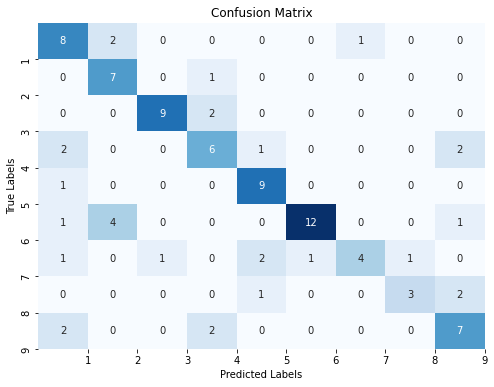

In [ ]:
display_confusion_matrix(vgg19_true_labels_list, vgg19_predicted_labels)

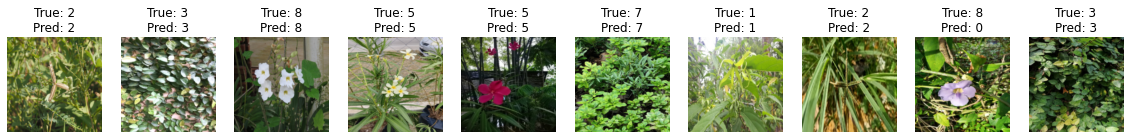

In [ ]:
from sklearn.preprocessing import LabelBinarizer

def display_image_predictions(images, true_labels, predicted_labels, label_names=None, num_images=10):
    """
    Display a sample of images with their predicted and true labels.

    :param images: The array of images.
    :param true_labels: The true labels for the images.
    :param predicted_labels: The predicted labels for the images.
    :param label_names: Optional; A list of names corresponding to the labels.
    :param num_images: The number of images to display.
    """
    # Randomly select `num_images` images
    indices = np.random.choice(range(len(images)), num_images, replace=False)

    plt.figure(figsize=(20, 4))
    for i, index in enumerate(indices):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[index])
        if label_names is not None:
            true_label = label_names[true_labels[index]]
            predicted_label = label_names[predicted_labels[index]]
        else:
            true_label = true_labels[index]
            predicted_label = predicted_labels[index]

        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis("off")
    plt.show()

# Convert true labels list to numpy array for indexing
vgg19_true_labels_array = np.array(vgg19_true_labels_list)

# Call the function
display_image_predictions(X_test, vgg19_true_labels_array, vgg19_predicted_labels, num_images=10)


## [7.2] ResNet-101

In [ ]:
# Evaluate the model on the test data
resnet101_test_loss, resnet101_test_accuracy = loaded_resnet101_model.evaluate(X_test, y_test)
print(f"Test Loss: {resnet101_test_loss}, Test Accuracy: {resnet101_test_accuracy}")

3/3 [==============================] - 10s 3s/step - loss: 2.0494 - accuracy: 0.3333
Test Loss: 2.0494484901428223, Test Accuracy: 0.3333333432674408


In [ ]:
resnet101_predicted_labels, resnet101_true_labels_list = make_predictions_and_evaluate(loaded_resnet101_model, X_test, y_test)

3/3 [==============================] - 10s 2s/step


In [ ]:
calculate_classification_metrics(resnet101_true_labels_list, resnet101_predicted_labels)

Accuracy: 0.3333
Precision: 0.3486
Recall: 0.2795
F1 Score: 0.3102


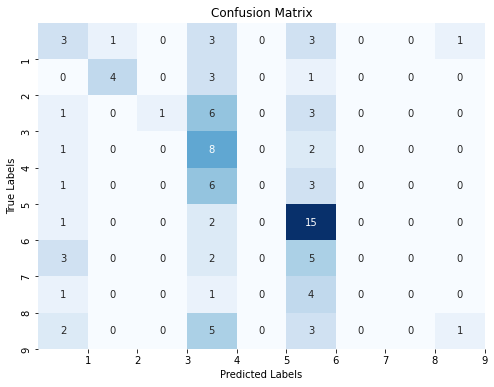

In [ ]:
display_confusion_matrix(resnet101_true_labels_list, resnet101_predicted_labels)

## [7.3] MobileNetV2

In [ ]:
# Evaluate the model on the test data
mobilenetv2_test_loss, mobilenetv2_test_accuracy = loaded_mobilenetv2_model.evaluate(X_test, y_test)
print(f"Test Loss: {mobilenetv2_test_loss}, Test Accuracy: {mobilenetv2_test_accuracy}")

3/3 [==============================] - 2s 216ms/step - loss: 2.2551 - accuracy: 0.8125
Test Loss: 2.255124568939209, Test Accuracy: 0.8125


In [ ]:
mobilenetv2_predicted_labels, mobilenetv2_true_labels_list = make_predictions_and_evaluate(loaded_mobilenetv2_model, X_test, y_test)

3/3 [==============================] - 1s 204ms/step - loss: 2.2551 - accuracy: 0.8125


3/3 [==============================] - 2s 227ms/step


In [ ]:
calculate_classification_metrics(mobilenetv2_true_labels_list, mobilenetv2_predicted_labels)

Accuracy: 0.8125
Precision: 0.8190
Recall: 0.8166
F1 Score: 0.8178


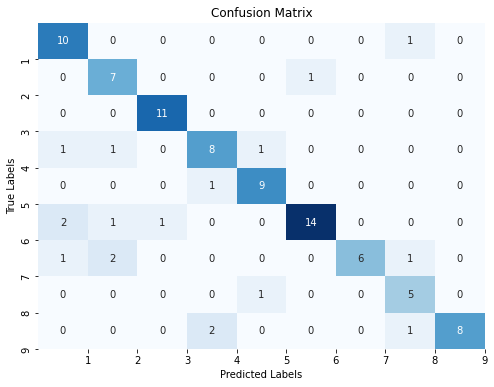

In [ ]:
display_confusion_matrix(mobilenetv2_true_labels_list, mobilenetv2_predicted_labels)

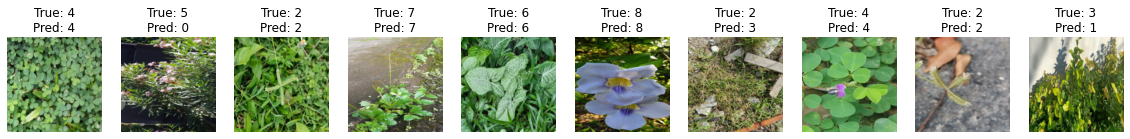

In [ ]:
from sklearn.preprocessing import LabelBinarizer

def display_image_predictions(images, true_labels, predicted_labels, label_names=None, num_images=10):
    """
    Display a sample of images with their predicted and true labels.

    :param images: The array of images.
    :param true_labels: The true labels for the images.
    :param predicted_labels: The predicted labels for the images.
    :param label_names: Optional; A list of names corresponding to the labels.
    :param num_images: The number of images to display.
    """
    # Randomly select `num_images` images
    indices = np.random.choice(range(len(images)), num_images, replace=False)

    plt.figure(figsize=(20, 4))
    for i, index in enumerate(indices):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(images[index])
        if label_names is not None:
            true_label = label_names[true_labels[index]]
            predicted_label = label_names[predicted_labels[index]]
        else:
            true_label = true_labels[index]
            predicted_label = predicted_labels[index]

        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis("off")
    plt.show()

# Convert true labels list to numpy array for indexing
mobilenetv2_true_labels_array = np.array(mobilenetv2_true_labels_list)

# Call the function
display_image_predictions(X_test, mobilenetv2_true_labels_array, mobilenetv2_predicted_labels, num_images=10)


## [7.4] EfficientNet-B0

In [ ]:
# Extract the 'serving_default' signature
signature = loaded_efficientnet_model.signatures['serving_default']

# Get the inference function or model signature
infer = signature

# Convert input data to float32 if it's not already
efficientnet_X_test = X_test.astype(np.float32)

# Perform evaluation on test data
output = infer(tf.constant(efficientnet_X_test))
predictions = output[list(output.keys())[0]]  # Adjust this based on the output key of your model

# Convert probabilities to class labels (assuming one-hot encoding)
efficientnet_predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels to class labels (assuming one-hot encoding)
efficientnet_true_labels = np.argmax(y_test, axis=1)

# Calculate test loss
efficientnet_test_loss = tf.keras.losses.categorical_crossentropy(y_test, predictions).numpy().mean()

# Calculate evaluation metrics (e.g., accuracy)
efficientnet_test_accuracy = np.mean(efficientnet_predicted_labels == efficientnet_true_labels)
print(f"Test Loss: {efficientnet_test_loss}, Test Accuracy: {efficientnet_test_accuracy}")

Test Loss: 4.003124237060547, Test Accuracy: 0.1875


In [ ]:
calculate_classification_metrics(efficientnet_true_labels, efficientnet_predicted_labels)

Accuracy: 0.1875
Precision: 0.0208
Recall: 0.1111
F1 Score: 0.0351


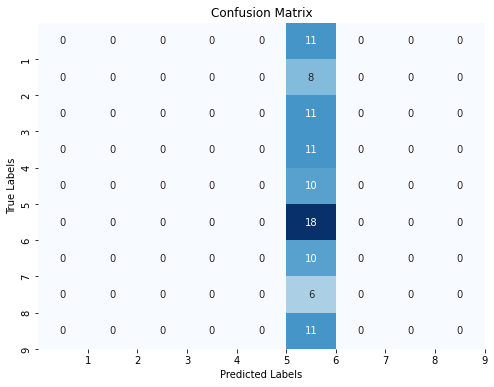

In [ ]:
display_confusion_matrix(efficientnet_true_labels, efficientnet_predicted_labels)